In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
# Import Data 
path = '/Users/Administrator/Desktop/'
file = pd.read_csv(path + 'term-deposit-marketing-2020.csv')
DF = pd.DataFrame(file)
#displaying data
DF.head(36)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,no


# Exploring the dataset

In [3]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


No missing values

In [4]:
DF.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'y'],
      dtype='object')

# Exploring Data Relations

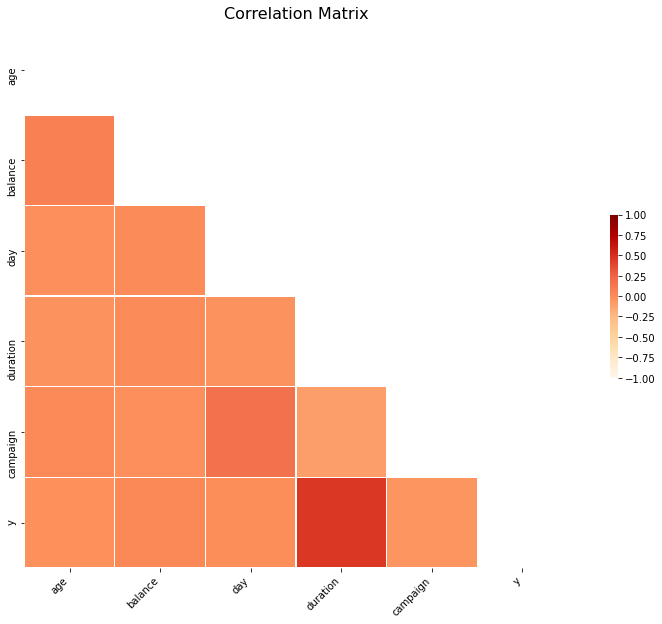

In [34]:
plt.figure(figsize=(15,10))

corr = DF.corr()
#plt.rcParams["figure.figsize"] = (10,10)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
ax = sns.heatmap(

    corr, 

    vmin=-1, vmax=1, center=0,
cmap='OrRd',
    #cmap=sns.diverging_palette(250, 15, s=75, l=40,
   #         n=9, center="dark"),
mask=mask, 
square=True,    
linewidths=.3,
cbar_kws={"shrink": .3}, 
  
)

ax.set_xticklabels(

    ax.get_xticklabels(),

    rotation=45,

    horizontalalignment='right'

);


plt.title('Correlation Matrix', fontsize=16);

Duration is clearly related to Subscription

# Preprocessing Data for a Model

In [3]:
y = DF['y']

In [4]:
ynumbs= []
for i in y: 
    if i == 'yes': 
       ynumbs.append(1) 
    elif i == 'no': 
       ynumbs.append(0) 

In [5]:
DF['y'] = ynumbs

In [6]:
DF['y'].value_counts()

0    37104
1     2896
Name: y, dtype: int64

In [8]:
DF.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,0


In [13]:

# check version number
import imblearn
from imblearn.over_sampling import SMOTE
Xfeutures = DF.loc[:,DF.columns!='y']
#Xtocat = X.drop(['y','balance','duration','age','day','campaign'], axis= 1)
from sklearn.preprocessing import OneHotEncoder
dfcat = Xfeutures.select_dtypes(include ='object') 
enc = OneHotEncoder(sparse=False)
X_transdf = enc.fit_transform(dfcat)

In [8]:
from pandas import DataFrame
from sklearn.preprocessing import MinMaxScaler
scaledf = MinMaxScaler()
scaledf.fit(DF[['duration','balance']])
scaled = scaledf.transform(DF[['duration','balance']])
DF[['duration','balance']] = DataFrame(scaled)
DF

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,0.092259,yes,no,unknown,5,may,0.053070,1,0
1,44,technician,single,secondary,no,0.073067,yes,no,unknown,5,may,0.030704,1,0
2,33,entrepreneur,married,secondary,no,0.072822,yes,yes,unknown,5,may,0.015453,1,0
3,47,blue-collar,married,unknown,no,0.086476,yes,no,unknown,5,may,0.018707,1,0
4,33,unknown,single,unknown,no,0.072812,no,no,unknown,5,may,0.040260,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,technician,married,tertiary,no,0.076390,no,no,cellular,3,jun,0.021757,1,0
39996,30,management,single,tertiary,no,0.103127,no,no,cellular,3,jun,0.048394,3,1
39997,54,admin,divorced,secondary,no,0.074619,no,no,cellular,3,jun,0.034567,1,1
39998,34,management,married,tertiary,no,0.082309,no,no,cellular,3,jun,0.069540,1,0


In [14]:
df = pd.DataFrame(X_transdf, DF)  
df

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
"(58, management, married, tertiary, no, 0.09225936484302653, yes, no, unknown, 5, may, 0.05307035380235868, 1, 0)",0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
"(44, technician, single, secondary, no, 0.07306665698255044, yes, no, unknown, 5, may, 0.030703538023586822, 1, 0)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
"(33, entrepreneur, married, secondary, no, 0.07282152779038731, yes, yes, unknown, 5, may, 0.015453436356242375, 1, 0)",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
"(47, blue-collar, married, unknown, no, 0.0864761316797705, yes, no, unknown, 5, may, 0.01870679137860919, 1, 0)",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
"(33, unknown, single, unknown, no, 0.0728124489314183, no, no, unknown, 5, may, 0.04026026840178935, 1, 0)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(53, technician, married, tertiary, no, 0.07638951936520619, no, no, cellular, 3, jun, 0.02175681171207808, 1, 0)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
"(30, management, single, tertiary, no, 0.10312675902892525, no, no, cellular, 3, jun, 0.04839365595770639, 3, 1)",0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
"(54, admin, divorced, secondary, no, 0.07461914186625025, no, no, cellular, 3, jun, 0.03456689711264742, 1, 1)",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
"(34, management, married, tertiary, no, 0.0823089354129973, no, no, cellular, 3, jun, 0.06954046360309069, 1, 0)",0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [12]:
feature_names = [i for i in DF.columns]
Xfeutures = DF[feature_names]
Xfeutures

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,0.092259,yes,no,unknown,5,may,0.053070,1,0
1,44,technician,single,secondary,no,0.073067,yes,no,unknown,5,may,0.030704,1,0
2,33,entrepreneur,married,secondary,no,0.072822,yes,yes,unknown,5,may,0.015453,1,0
3,47,blue-collar,married,unknown,no,0.086476,yes,no,unknown,5,may,0.018707,1,0
4,33,unknown,single,unknown,no,0.072812,no,no,unknown,5,may,0.040260,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,technician,married,tertiary,no,0.076390,no,no,cellular,3,jun,0.021757,1,0
39996,30,management,single,tertiary,no,0.103127,no,no,cellular,3,jun,0.048394,3,1
39997,54,admin,divorced,secondary,no,0.074619,no,no,cellular,3,jun,0.034567,1,1
39998,34,management,married,tertiary,no,0.082309,no,no,cellular,3,jun,0.069540,1,0


In [15]:
# Split data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, ynumbs, test_size=0.3)

In [16]:
# transform the dataset
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [17]:
from collections import Counter
counter = Counter(y_train)
print(counter)

Counter({1: 25943, 0: 25943})


# Tuning and Performing a Model

In [18]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(i) for i in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(j) for j in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [19]:
from sklearn.ensemble import RandomForestClassifier
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rfclf = RandomForestClassifier(max_depth=10)
# Random search of parameters, using 3 fold cross validation, 
# search across  different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rfclf, param_distributions = random_grid, n_iter = 5, cv = 5, verbose=2, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=10),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   verbose=2)

In [20]:
rf_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': False}

In [21]:
best_random = rf_random.best_estimator_
best_random

RandomForestClassifier(bootstrap=False, max_depth=100, max_features='sqrt',
                       min_samples_leaf=2, n_estimators=1800)

# Model Performance

In [55]:
from sklearn.metrics import classification_report
predictiontrain = best_random.predict(X_train)

print(classification_report(y_train, predictiontrain))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84     25997
           1       0.86      0.79      0.82     25997

    accuracy                           0.83     51994
   macro avg       0.83      0.83      0.83     51994
weighted avg       0.83      0.83      0.83     51994



In [56]:
from sklearn.metrics import classification_report
predictiontest = best_random.predict(X_test)

print(classification_report(y_test, predictiontest))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90     11107
           1       0.16      0.32      0.21       893

    accuracy                           0.82     12000
   macro avg       0.55      0.59      0.56     12000
weighted avg       0.88      0.82      0.85     12000



# Predictions

In [57]:
Pred = best_random.predict(X_test)


In [58]:
Predtrain = best_random.predict(X_train)
Predtrain

array([0, 0, 0, ..., 1, 0, 1])

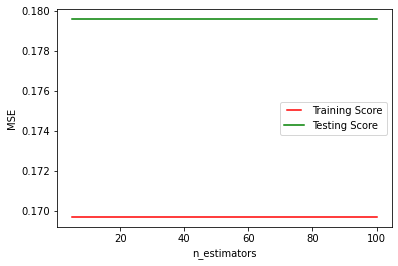

In [59]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

train_results = []
test_results = []
list_nb_trees = [5, 10, 15, 30, 45, 60, 80, 100]

for nb_trees in list_nb_trees:
    rfclf = RandomForestClassifier(n_estimators=nb_trees)
    rfclf.fit(X_train, y_train)

    train_results.append(mean_squared_error(y_train, Predtrain))
    test_results.append(mean_squared_error(y_test, Pred))

line1, = plt.plot(list_nb_trees, train_results, color="r", label="Training Score")
line2, = plt.plot(list_nb_trees, test_results, color="g", label="Testing Score")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('MSE')
plt.xlabel('n_estimators')
plt.show()

In [62]:
DF = DF[:12000]

In [63]:
DF.insert(14, 'Predicted', Pred)

In [64]:
DF.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y,Predicted,cluster
0,58,management,married,tertiary,no,0.092259,yes,no,unknown,5,may,0.053070,1,0,0,4.0
1,44,technician,single,secondary,no,0.073067,yes,no,unknown,5,may,0.030704,1,0,0,1.0
2,33,entrepreneur,married,secondary,no,0.072822,yes,yes,unknown,5,may,0.015453,1,0,0,4.0
3,47,blue-collar,married,unknown,no,0.086476,yes,no,unknown,5,may,0.018707,1,0,0,4.0
4,33,unknown,single,unknown,no,0.072812,no,no,unknown,5,may,0.040260,1,0,1,3.0


In [65]:
importance = best_random.feature_importances_[:13]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.03195
Feature: 1, Score: 0.03898
Feature: 2, Score: 0.01917
Feature: 3, Score: 0.01513
Feature: 4, Score: 0.03942
Feature: 5, Score: 0.01736
Feature: 6, Score: 0.02072
Feature: 7, Score: 0.03153
Feature: 8, Score: 0.01007
Feature: 9, Score: 0.03267
Feature: 10, Score: 0.01904
Feature: 11, Score: 0.00539
Feature: 12, Score: 0.02413


# Plotting Features Rates

<BarContainer object of 13 artists>

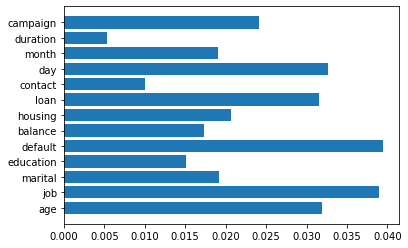

In [66]:
index=['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign']
dsetfeat = pd.DataFrame(DF, index=['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign'],  columns=index)
plt.barh(dsetfeat.index, best_random.feature_importances_[:13])

# Confusion Matrix  on a Test Set

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


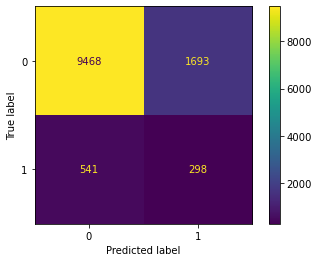

In [35]:

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(best_random, X_test, y_test)  
plt.show() 

298 True Positive, 541 False Negative from Subscribed Customers

# Unsupervised Clustering Kmeans Who Will Subscribe what makes people buy a product


Data Preprocessing

Selecting only Subscribed Customers

In [ ]:
df_mask=DF['y']==1
filtered_df = DF[df_mask]
filtered_df.head()

In [9]:
Xdf = filtered_df.drop(['y','balance','duration','age','day','campaign'], axis= 1)


In [10]:
Xdf

,job,marital,education,default,housing,loan,contact,month
83,admin,married,secondary,no,yes,no,unknown,may
86,admin,married,secondary,no,no,no,unknown,may
87,technician,married,secondary,no,yes,no,unknown,may
129,services,married,secondary,no,yes,no,unknown,may
168,admin,married,tertiary,no,no,no,unknown,may
...,...,...,...,...,...,...,...,...
39986,management,single,tertiary,no,yes,no,cellular,jun
39988,management,divorced,tertiary,no,no,no,cellular,jun
39990,technician,single,secondary,no,yes,no,cellular,jun
39996,management,single,tertiary,no,no,no,cellular,jun


In [25]:
encdf = OneHotEncoder(sparse=False)
Xdf = encdf.fit_transform(Xdf[['job','marital','education','default','housing','loan','contact','month']])
Xdf


array([[1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [16]:
from pandas import DataFrame
from sklearn.preprocessing import MinMaxScaler
scalerdf = MinMaxScaler()
scalerdf.fit(DF[['duration','balance']])
DFscaled = scalerdf.transform(DF[['duration','balance']])
filtered_df[['duration','balance']] = DataFrame(DFscaled)

filtered_df

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
83,59,admin,married,secondary,no,0.094075,yes,no,unknown,5,may,0.211875,1,1
86,56,admin,married,secondary,no,0.073212,no,no,unknown,5,may,0.298292,1,1
87,41,technician,married,secondary,no,0.084334,yes,no,unknown,5,may,0.282432,1,1
129,55,services,married,secondary,no,0.095283,yes,no,unknown,5,may,0.117731,1,1
168,54,admin,married,tertiary,no,0.074474,no,no,unknown,5,may,0.136844,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39986,29,management,single,tertiary,no,0.078587,yes,no,cellular,3,jun,0.069134,1,1
39988,55,management,divorced,tertiary,no,0.094438,no,no,cellular,3,jun,0.120171,2,1
39990,26,technician,single,secondary,no,0.083979,yes,no,cellular,3,jun,0.078284,2,1
39996,30,management,single,tertiary,no,0.103127,no,no,cellular,3,jun,0.048394,3,1


In [26]:

newdf = pd.DataFrame(Xdf, filtered_df)  
newdf

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
"(59, admin, married, secondary, no, 0.0940751366368275, yes, no, unknown, 5, may, 0.21187474583163887, 1, 1)",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
"(56, admin, married, secondary, no, 0.07321191872605452, no, no, unknown, 5, may, 0.2982919886132574, 1, 1)",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
"(41, technician, married, secondary, no, 0.08433352096308537, yes, no, unknown, 5, may, 0.28243188287921916, 1, 1)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
"(55, services, married, secondary, no, 0.09528262487970512, yes, no, unknown, 5, may, 0.11773078487189914, 1, 1)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
"(54, admin, married, tertiary, no, 0.07447388012274618, no, no, unknown, 5, may, 0.1368442456283042, 2, 1)",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(29, management, single, tertiary, no, 0.07858660323570535, yes, no, cellular, 3, jun, 0.06913379422529484, 1, 1)",0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
"(55, management, divorced, tertiary, no, 0.09443829099558768, no, no, cellular, 3, jun, 0.12017080113867426, 2, 1)",0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
"(26, technician, single, secondary, no, 0.08397944546329418, yes, no, cellular, 3, jun, 0.0782838552257015, 2, 1)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
"(30, management, single, tertiary, no, 0.10312675902892525, no, no, cellular, 3, jun, 0.04839365595770639, 3, 1)",0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Selectig Number of Clusters

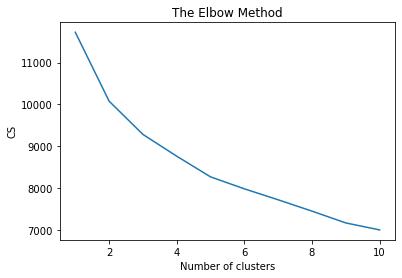

In [28]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(newdf)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

Number of Clusters is 5 but it gave more error data points than 4  so I selected 4 clusters.

Applying a model.

In [67]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(newdf)
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1
# New Dataframe called cluster
cluster = pd.DataFrame(y_kmeans1)
# Adding cluster to the Dataset1
DF['cluster'] = cluster
#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(DF.groupby('cluster').mean(),1))
kmeans_mean_cluster

<ipython-input-67-1a26b3c1b6c4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF['cluster'] = cluster


,age,balance,day,duration,campaign,y,Predicted
cluster,,,,,,,
1.0,40.6,0.1,9.1,0.1,2.0,0.0,0.2
2.0,41.1,0.1,8.7,0.1,2.0,0.0,0.1
3.0,39.8,0.1,8.6,0.1,2.1,0.0,0.2
4.0,40.2,0.1,9.1,0.1,2.1,0.0,0.1


In [68]:
from sklearn.manifold import TSNE
tsne = TSNE(verbose=1, perplexity=40, n_iter=300, random_state=100)
tsne_results = tsne.fit_transform(newdf)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2896 samples in 0.130s...
[t-SNE] Computed neighbors for 2896 samples in 1.065s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2896
[t-SNE] Computed conditional probabilities for sample 2000 / 2896
[t-SNE] Computed conditional probabilities for sample 2896 / 2896
[t-SNE] Mean sigma: 0.305352
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.601974
[t-SNE] KL divergence after 300 iterations: 1.458107


In [69]:
labels=np.array(kmeans.labels_)

In [70]:
LABEL_COLOR_MAP = {0 : 'r',
                   1 : 'k',
                   2 : 'g',
                   3 : 'b' }

label_color = [LABEL_COLOR_MAP[l] for l in labels]


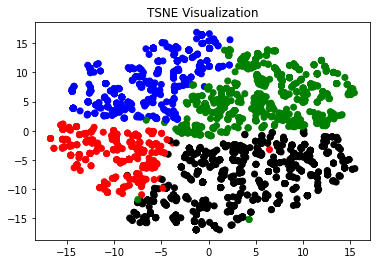

In [71]:
# visualize TSNE
x_axis = tsne_results[:,0]
y_axis = tsne_results[:,1]

plt.scatter(x_axis, y_axis, c=label_color, cmap=plt.cm.get_cmap("jet", 100))



plt.title("TSNE Visualization")
plt.show()


Almost ideally clustered customers data but error data points are outliers

Dimension Reduction for 3D plot

In [72]:
from sklearn.manifold import TSNE
tsne3D = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300, random_state=100)
tsne_results3D = tsne3D.fit_transform(newdf)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2896 samples in 0.000s...
[t-SNE] Computed neighbors for 2896 samples in 0.484s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2896
[t-SNE] Computed conditional probabilities for sample 2000 / 2896
[t-SNE] Computed conditional probabilities for sample 2896 / 2896
[t-SNE] Mean sigma: 0.305352
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.677628
[t-SNE] KL divergence after 300 iterations: 1.306646


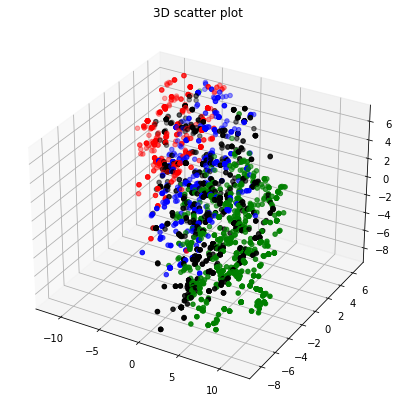

In [73]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
xs = tsne_results3D[:,0]
ys = tsne_results3D[:,1]
z = tsne_results3D[:,1] 
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(xs, ys, z, color = label_color)
plt.title("3D scatter plot")
 
# show plot
plt.show()

In [75]:
DF['cluster'].value_counts()

2.0    1032
3.0     812
4.0     620
1.0     432
Name: cluster, dtype: int64

# SHAP Analysis for Exploring Important Features to Explore What Makes Customers to Subscribe

In [31]:
import shap  # package used to calculate Shap values
row_to_show = 13
data_for_prediction = X_test.iloc[row_to_show] 
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)
best_random.predict_proba(data_for_prediction_array)

array([[0.96855484, 0.03144516]])

In [23]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(best_random)


In [24]:
shap_values = explainer.shap_values(data_for_prediction_array)

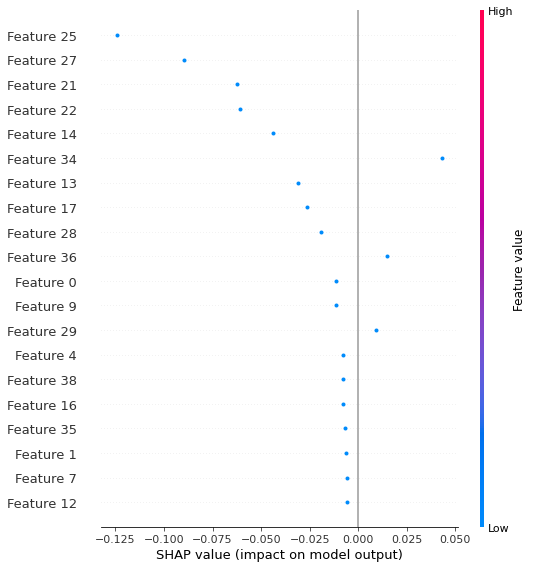

In [33]:
# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1], data_for_prediction_array)

Top 8 features are rated as high so  these features makes customers to subscribe.

In [28]:
enc.get_feature_names(['25', '27','21','22', '14','34','13','17'])

array(['25_admin', '25_blue-collar', '25_entrepreneur', '25_housemaid',
       '25_management', '25_retired', '25_self-employed', '25_services',
       '25_student', '25_technician', '25_unemployed', '25_unknown',
       '27_divorced', '27_married', '27_single', '21_primary',
       '21_secondary', '21_tertiary', '21_unknown', '22_no', '22_yes',
       '14_no', '14_yes', '34_no', '34_yes', '13_cellular',
       '13_telephone', '13_unknown', '17_apr', '17_aug', '17_dec',
       '17_feb', '17_jan', '17_jul', '17_jun', '17_mar', '17_may',
       '17_nov', '17_oct'], dtype=object)

Thes are Marital status, Job,  housing, education, default, contact, month

In [37]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction_array)